# 크롤링

In [2]:
!pip install requests
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* F12 : 개발자 도구
  - F1 → disable javascript
---
* Tag
* Id
* Class ```.```


  - ex) class="ball645 ball1" : ball645 아래의 ball1

## 기초

In [5]:
import requests
from bs4 import BeautifulSoup as bs # 여러개의 패키지 중 하나만

In [6]:
res = requests.get('https://dhlottery.co.kr/common.do?method=main') # 통신 결과를 res 에 담음.
res # res.content -> body

<Response [200]>

In [ ]:
soup = bs(res.content, 'html.parser') # 가져온 res의 content 를

In [12]:
result = soup.select('.ball_645') # ball_645 클래스인것만 가져와 리스트 생성

In [39]:
for num in result:
  print(num.text, end='번 ') # tag 를 빼고 text 만 꺼내옴

7번 16번 25번 29번 35번 36번 28번 

In [40]:
nums = []
for num in result:
  nums.append(int(num.text))

In [42]:
# series 형태로 담기
import pandas as pd
ser = pd.Series(nums)
ser

0     7
1    16
2    25
3    29
4    35
5    36
6    28
dtype: int64

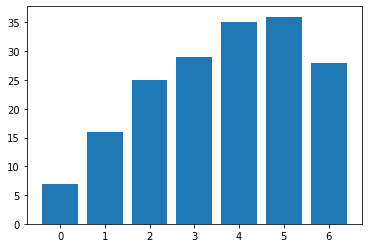

In [44]:
# bar 형태로 출력하기
import matplotlib.pyplot as plt
y = [i for i in range(7)]
plt.bar(y, ser)
plt.show()

## 뉴스 수집

In [50]:
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 29.3 MB/s 
     |████████████████████████████████| 93 kB 2.7 MB/s 
     |████████████████████████████████| 81 kB 9.5 MB/s 
     |████████████████████████████████| 7.4 MB 46.1 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=636e32f999a703295092dfd7da06a3e53b2d0bef635709d57d57e32f1a83f42d
  Stored in directory: /root/.cache/pip/wheels/99/74/83/8fac1c8d9c648cfabebbbffe97a889f6624817f3aa0bbe6c09
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3354 sha256=da195d0abacde243430bd4e9a030f7c8227fdfd76f012c8a55c4364f02ba3690
  Stored in directory: /root/.cache/pip/wheels/b6/09/68/a9f15498ac02c23dde29f18745bc6a6f574ba4ab41861a3575
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=7c1df6fb5015f3fe743003f247e6ceeaa7e4acbab2d6bda5

In [52]:
# 기사 본문 가져오기
import newspaper as news

link = 'https://n.news.naver.com/mnews/article/001/0013653044?sid=105'

article = news.Article(link, language='ko')
article.download()
article.parse()

print(article.text) # article.text : 본문만



[이노스페이스 제공. 재판매 및 DB 금지] [2022.12.18 송고] [이노스페이스 제공. 재판매 및 DB 금지] [2022.12.18 송고]

(서울=연합뉴스) 문다영 기자 = 국내 우주 스타트업 이노스페이스가 20일 오후 6시께 발사할 예정이었던 독자개발 엔진검증용 시험발사체 '한빛-TLV'의 발사가 기술적 문제로 인해 무산됐다.지난 18일 비 예보로 한 차례 연기한 데 이어 두 번째 발사 일정 변경이다.당초 한빛-TLV는 브라질 알칸타라 우주센터에서 현지시간 20일 오전 6시(한국시간 20일 오후 6시)께 발사될 예정이었다.한빛-TLV는 이노스페이스가 독자 개발한 추력 15t급 하이브리드 엔진의 비행 성능을 검증하려는 목적으로 만들어진 1단형 시험발사체다.이노스페이스는 "브라질 현지시간 20일 오전 4시께 막바지 발사 준비 중 펌프 냉각계 밸브에 이상을 감지했다"며 "필요한 기술적 조치를 취한 뒤에 다시 발사를 시도하겠다"고 말했다.이노스페이스에 따르면 기술진은 현지시간 19일 오후 4시부터 조립동에서 발사대로 시험발사체 '한빛-TLV'를 이송해 발사대에 정상적으로 안착시켰다.이후 기립 전 점검을 하다가 펌프 냉각계 밸브에 문제가 있다는 사실을 확인하고 해결하려고 노력했으나 결국 발사 일정을 미루기로 결론내렸다.현재 이노스페이스 연구진들은 한빛-TLV를 조립동으로 이송해 원인을 확인하고 있다.이노스페이스가 브라질 측과 협의한 한빛-TLV의 발사 예비기간은 21일까지로 아직 하루 남아있다.이노스페이스 관계자는 "내일(21일) 하루가 남아있어서, 오늘(20일) 조치가 잘 되길 바라고 있다"고 말했다.만일 21일까지도 문제가 해결되지 않으면, 이노스페이스는 브라질 측과 다시 발사 예비기간을 협의해야 한다.기상이나 기술적 결함으로 발사체의 발사 일정이 미뤄지는 일은 흔하다.한국형 발사체 누리호 2차 발사 때도 기상 문제와 기계적 결함이 각각 발생하며 두 차례 발사가 미뤄진 바 있다.2차 발사 첫 예정일이었던 6월 15일을 하루 앞둔 14일, 나로우주센터 

### 기사목록에서 링크를 추출해서, 개별 기사 본문 보여주기

In [80]:
# 기사 목록 가져오기
res = requests.get('https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105', headers={'User-agent': 'Mozilla/5.0'}) # 통신 결과를 res 에 담음.
# res.content -> body

soup = bs(res.content, 'html.parser') # 가져온 res의 content 를 parse

result = soup.select('.cluster_text_headline')
#result
#cluster_text_headline nclicks(cls_sci.clsart)

In [98]:
# 링크 추출
links = []
for href in result:
  links.append((href.text, href.attrs['href'])) # [(title, link), ...]

In [ ]:
for lik in links:
  article = news.Article(lik[1], language='ko')
  article.download()
  article.parse()
  print(f'title : {lik[0]}')
  print(f'content : {article.text}')